In [2]:
! pip install praw networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.3 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

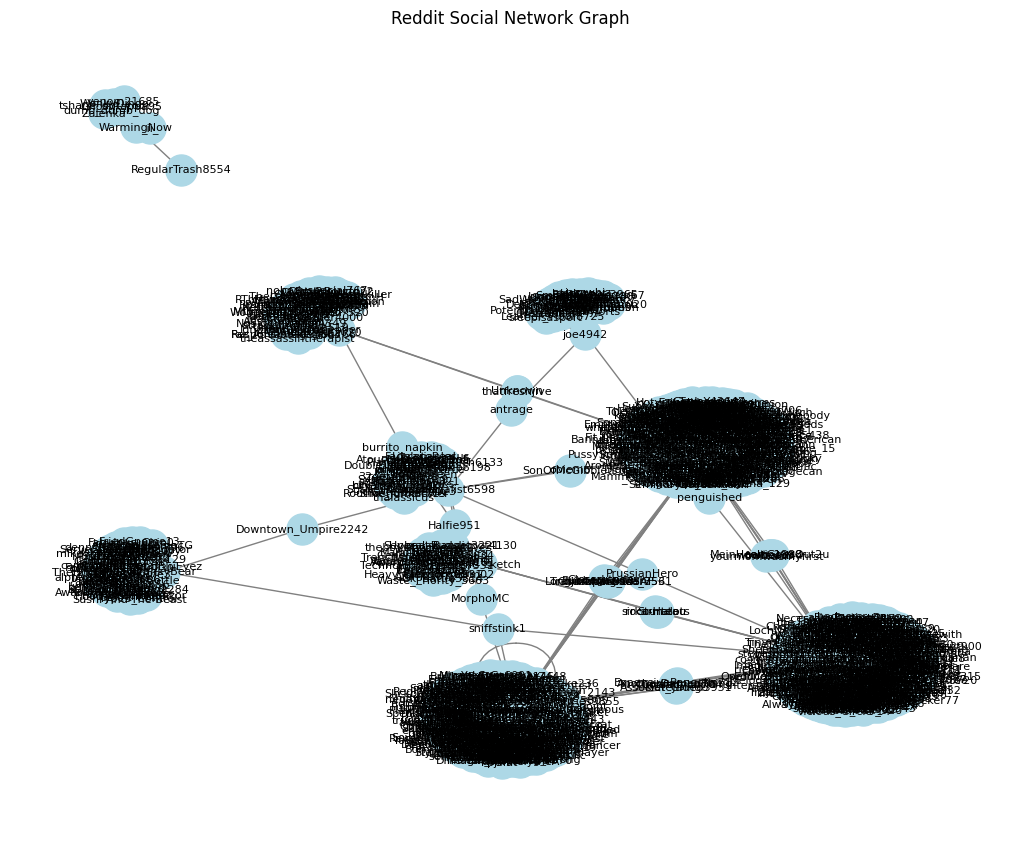


Graph Metrics:
Network Density: 0.0020
Node: esporx
  Degree Centrality: 0.2845
  Betweenness Centrality: 0.5486
  Closeness Centrality: 0.3927

Node: ZanzerFineSuits
  Degree Centrality: 0.0010
  Betweenness Centrality: 0.0000
  Closeness Centrality: 0.2814

Node: Aldren
  Degree Centrality: 0.0010
  Betweenness Centrality: 0.0000
  Closeness Centrality: 0.2814

Node: rocourteau
  Degree Centrality: 0.0019
  Betweenness Centrality: 0.0185
  Closeness Centrality: 0.2956

Node: SpleenBender
  Degree Centrality: 0.0010
  Betweenness Centrality: 0.0000
  Closeness Centrality: 0.2814

Node: Korach
  Degree Centrality: 0.0010
  Betweenness Centrality: 0.0000
  Closeness Centrality: 0.2814

Node: ShootsScores29
  Degree Centrality: 0.0010
  Betweenness Centrality: 0.0000
  Closeness Centrality: 0.2814

Node: mother_a_god
  Degree Centrality: 0.0010
  Betweenness Centrality: 0.0000
  Closeness Centrality: 0.2814

Node: Tibreaven
  Degree Centrality: 0.0010
  Betweenness Centrality: 0.0000
  

In [4]:
import os
import praw
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

def authenticate_reddit():
    # Define the API credentials within the function
    CLIENT_ID = "JsmvtICXZGE0q4yMnb4i2w"
    CLIENT_SECRET = "9JY0sQul5OBUM2klZTMr9hAI1X3_9g"
    USER_AGENT = "myRedditScraper/1.0 by yash"

    return praw.Reddit(client_id=CLIENT_ID,
                       client_secret=CLIENT_SECRET,
                       user_agent=USER_AGENT)

def fetch_reddit_data(subreddit_name="technology", limit=10):
    reddit = authenticate_reddit()
    subreddit = reddit.subreddit(subreddit_name)
    G = nx.Graph()

    for post in subreddit.hot(limit=limit):
        author = post.author.name if post.author else "Unknown"
        G.add_node(author)

        for comment in post.comments:
            if isinstance(comment, praw.models.Comment):
                commenter = comment.author.name if comment.author else "Unknown"
                G.add_node(commenter)
                G.add_edge(author, commenter)

    return G

def compute_graph_metrics(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    density = nx.density(G)

    print("\nGraph Metrics:")
    print(f"Network Density: {density:.4f}")

    for node in G.nodes():
        print(f"Node: {node}\n  Degree Centrality: {degree_centrality[node]:.4f}\n  Betweenness Centrality: {betweenness_centrality[node]:.4f}\n  Closeness Centrality: {closeness_centrality[node]:.4f}\n")

def visualize_graph(G):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=8)
    plt.title("Reddit Social Network Graph")
    plt.show()

if __name__ == "__main__":
    G = fetch_reddit_data()
    visualize_graph(G)
    compute_graph_metrics(G)
